# Clase sobre la Transformada de Fourier para Data Scientists

## Introducción

La **Transformada de Fourier** es una herramienta fundamental en matemáticas y procesamiento de señales. Se utiliza para descomponer una señal en sus componentes de frecuencia. En el contexto de un **Data Scientist**, la Transformada de Fourier puede ser extremadamente útil para analizar y procesar datos temporales, como series de tiempo, señales, imágenes y cualquier conjunto de datos que implique fluctuaciones periódicas.

---

## 1. ¿Qué es la Transformada de Fourier?

La Transformada de Fourier convierte una señal en el dominio del tiempo (o del espacio) en una representación en el dominio de las frecuencias. En otras palabras, toma una señal que varía con el tiempo y la descompone en las frecuencias que la componen.

### **Fórmula Matemática**
La Transformada de Fourier continua (para una señal $ f(t) $) se define como:

$$
F(\omega) = \int_{-\infty}^{\infty} f(t) e^{-i \omega t} dt
$$

Donde:
- $ f(t) $: La señal original en el dominio del tiempo.
- $ F(\omega) $: La señal transformada en el dominio de la frecuencia.
- $ \omega $: La frecuencia angular de las componentes de la señal.

### **Método de Feynman**
Imagina que tienes una canción con diferentes instrumentos. Cada instrumento tiene una frecuencia (como el tono de una guitarra, o los graves de un bajo). La Transformada de Fourier te permite escuchar los diferentes instrumentos de la canción de forma independiente, extrayendo las frecuencias individuales que componen la canción en su totalidad.

---

## 2. ¿Por qué es útil para un Data Scientist?

### **Aplicaciones Comunes:**
1. **Análisis de Series de Tiempo**:
   - Identificación de ciclos y patrones en datos temporales.
   - Ejemplo: Detectar patrones estacionales en ventas o tráfico web.
   
2. **Filtrado de Señales**:
   - Eliminar ruido de los datos al separar las frecuencias relevantes.
   - Ejemplo: Filtrar señales de audio, imágenes o datos médicos.

3. **Compresión de Datos**:
   - En muchos casos, las componentes de baja frecuencia contienen la mayor parte de la información útil.
   - Ejemplo: Reducir el tamaño de archivos de imágenes (como en JPEG).

4. **Detección de Anomalías**:
   - Las transformadas de Fourier pueden resaltar patrones anómalos que no son evidentes en el dominio del tiempo.
   - Ejemplo: Detectar patrones inusuales en la red de un sistema de monitoreo.

---

## 3. Tipos de Transformadas de Fourier

### **Transformada de Fourier Discreta (DFT)**

Para datos discretos (como una secuencia de mediciones en el tiempo), se utiliza la **Transformada de Fourier Discreta** (DFT). La DFT se calcula a partir de una secuencia de $ N $ puntos $ x[n] $:

$$
X[k] = \sum_{n=0}^{N-1} x[n] e^{-i 2 \pi \frac{k n}{N}}, \quad k = 0, 1, \dots, N-1
$$

### **Fast Fourier Transform (FFT)**

El **Fast Fourier Transform (FFT)** es un algoritmo eficiente para calcular la DFT, utilizado ampliamente en ciencia de datos debido a su rapidez.

- **Ventaja del FFT**: Calcula la DFT de manera mucho más rápida que la implementación directa.

---

## 4. Ejemplo Práctico de Transformada de Fourier en Python

### **Aplicación en una Serie de Tiempo**

Vamos a aplicar la Transformada de Fourier a una señal temporal simulada para ver cómo descomponemos una señal en sus frecuencias.

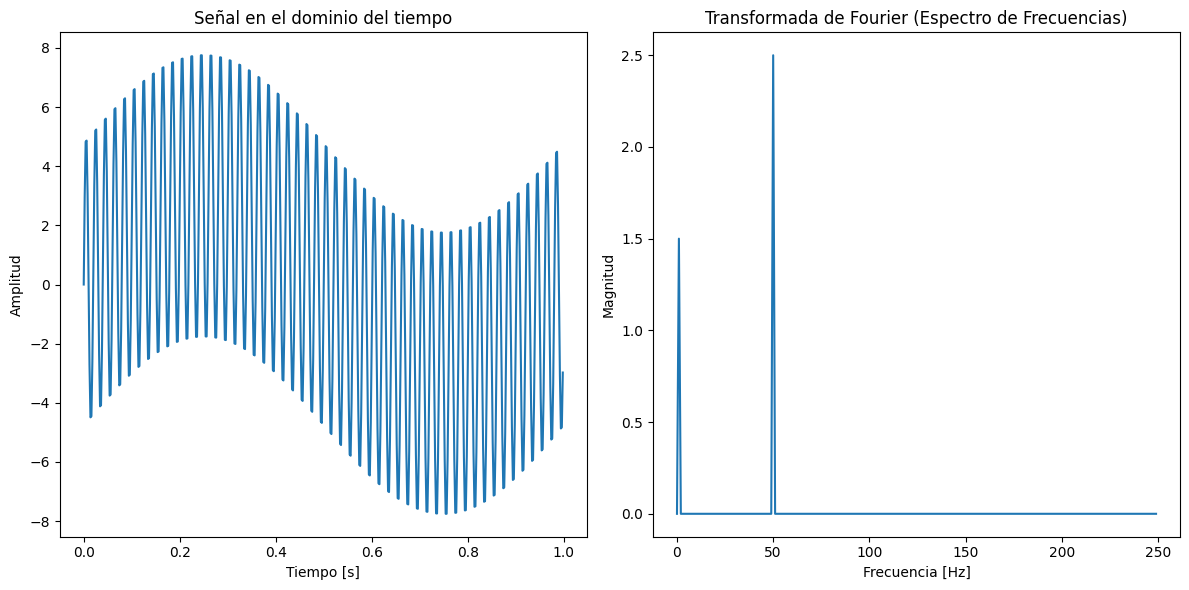

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Crear una señal con múltiples frecuencias
Fs = 500  # Frecuencia de muestreo (samples por segundo)
T = 1/Fs  # Periodo de muestreo
t = np.arange(0, 1, T)  # Tiempo en segundos

# Señal con dos frecuencias (1 Hz y 50 Hz)
f1 = 1  # Frecuencia de 1 Hz
f2 = 50  # Frecuencia de 50 Hz
signal = 3 * np.sin(2 * np.pi * f1 * t) + 5 * np.sin(2 * np.pi * f2 * t)

# Graficar la señal original
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(t, signal)
plt.title("Señal en el dominio del tiempo")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")

# Aplicar la Transformada de Fourier (FFT)
n = len(signal)  # Número de puntos en la señal
k = np.arange(n)
T2 = n / Fs
frq = k / T2  # Vector de frecuencia
frq = frq[range(n // 2)]  # Solo la mitad de la frecuencia es útil

# Aplicar FFT
signal_fft = np.fft.fft(signal) / n  # Normalizar
signal_fft = signal_fft[range(n // 2)]

# Graficar el espectro de frecuencias
plt.subplot(1, 2, 2)
plt.plot(frq, abs(signal_fft))  # Magnitud de la FFT
plt.title("Transformada de Fourier (Espectro de Frecuencias)")
plt.xlabel("Frecuencia [Hz]")
plt.ylabel("Magnitud")

plt.tight_layout()
plt.show()

### Interpretación del gráfico:
En el gráfico del dominio del tiempo, puedes ver cómo la señal contiene una combinación de dos frecuencias: 1 Hz y 50 Hz.
En el gráfico del dominio de la frecuencia (espectro), la Transformada de Fourier nos muestra picos en 1 Hz y 50 Hz, lo que confirma que estas son las frecuencias dominantes de la señal original.


## 5. Usos de la Transformada de Fourier para un Data Scientist
1. Análisis de Series de Tiempo

    En un conjunto de datos de series de tiempo, la Transformada de Fourier te permite identificar ciclos estacionales o patrones de oscilación, lo que es útil para prever tendencias.
    Ejemplo:
    Predicción de ventas: Al descomponer las ventas diarias en componentes de baja y alta frecuencia, puedes predecir comportamientos estacionales, como los picos de ventas en días festivos.

2. Filtrado de Señales

    La FFT se puede utilizar para filtrar el ruido de una señal. Al identificar las frecuencias de interés, puedes eliminar aquellas que no contribuyen significativamente al análisis.
    Ejemplo:
    Filtrado de ruido en datos de sensores: Si estás analizando los datos de un sensor, puedes usar la FFT para eliminar componentes de alta frecuencia que representan ruido.

3. Análisis de Imágenes

    Las imágenes pueden representarse en términos de frecuencias, y la Transformada de Fourier es útil para analizar y procesar imágenes en términos de sus frecuencias espaciales.
    Ejemplo:
    Compresión de imágenes: En formatos como JPEG, la Transformada de Fourier se utiliza para reducir el tamaño de las imágenes eliminando componentes de frecuencia que no son percibidos por el ojo humano.

## 6. Consideraciones y Limitaciones
- Ventajas:
    - Permite transformar señales complejas en representaciones simples en términos de frecuencias.
    - Es útil para detectar patrones periódicos y eliminar ruido en los datos.
- Limitaciones:
    - Solo es aplicable a señales periódicas o datos con características repetitivas.
    - La Transformada de Fourier Discreta (DFT) puede ser costosa computacionalmente, aunque el FFT mejora mucho la eficiencia.
## 7. Resumen Final
- La Transformada de Fourier es una herramienta poderosa para analizar y procesar datos temporales y espaciales.
- Es crucial para tareas como la detección de patrones, filtrado de señales y compresión de datos.
- Para los Data Scientists, la Transformada de Fourier puede proporcionar información valiosa sobre los ciclos y fluctuaciones en los datos, especialmente cuando trabajamos con series de tiempo o señales.

---

# Ejemplo cercano a la realidad
Supongamos que tienes un conjunto de datos de ventas diarias para una tienda en línea. Los datos contienen el número de ventas realizadas cada día durante un período de varios meses. La tarea del analista es identificar si existe alguna estacionalidad en las ventas, por ejemplo, picos durante los fines de semana o durante las campañas de marketing.

### Pasos que seguiría un analista con la Transformada de Fourier
- Cargar los datos de ventas: El analista tiene un conjunto de datos con ventas diarias y quiere analizar las frecuencias que podrían estar ocultas en la serie temporal.

- Aplicar la Transformada de Fourier: Usar la Fast Fourier Transform (FFT) para descomponer las ventas en frecuencias. Esto ayudará a identificar patrones periódicos (por ejemplo, ventas que se repiten cada semana, mes, etc.).

- Interpretar las frecuencias: El analista analizaría las frecuencias para identificar los ciclos subyacentes en los datos de ventas.

- Filtrar ruidos o fluctuaciones: Podría querer eliminar frecuencias de alta frecuencia que correspondan a ruido o fluctuaciones no significativas, dejándose solo con las frecuencias que indican estacionalidad.

### Ejemplo Práctico en Python: Análisis de Ventas Diarias con Fourier
1. Generar datos simulados de ventas diarias
Supongamos que tenemos 365 días de datos de ventas, con una tendencia estacional semanal y otro ciclo mensual:

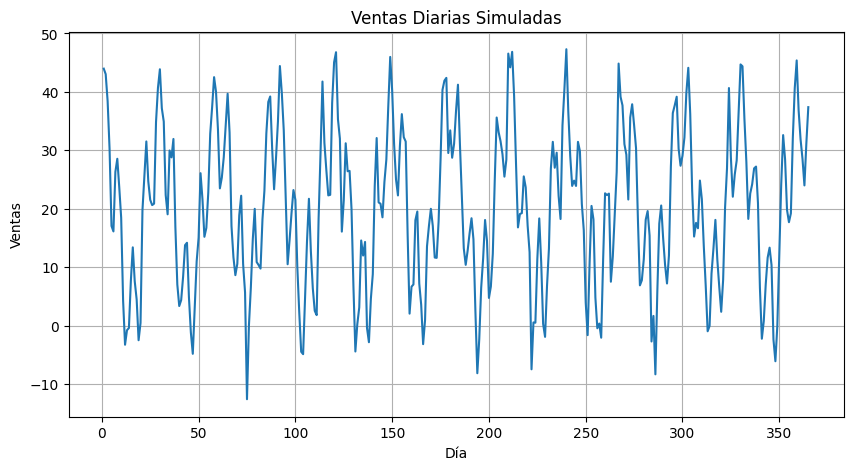

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Simulando datos de ventas diarias para un año (365 días)
np.random.seed(42)
days = np.arange(1, 366)
sales = 20 + 10 * np.sin(2 * np.pi * days / 7) + 15 * np.cos(2 * np.pi * days / 30) + np.random.normal(0, 3, len(days))

# Crear un DataFrame
df_sales = pd.DataFrame({'day': days, 'sales': sales})

# Graficar la serie temporal original
plt.figure(figsize=(10, 5))
plt.plot(df_sales['day'], df_sales['sales'])
plt.title('Ventas Diarias Simuladas')
plt.xlabel('Día')
plt.ylabel('Ventas')
plt.grid(True)
plt.show()

En este gráfico, verás las ventas diarias con una estacionalidad semanal y mensual. Ahora queremos usar la Transformada de Fourier para analizar los ciclos de frecuencia.

2. Aplicar la Transformada de Fourier

Ahora, vamos a usar FFT para descomponer esta serie temporal en componentes de frecuencia:

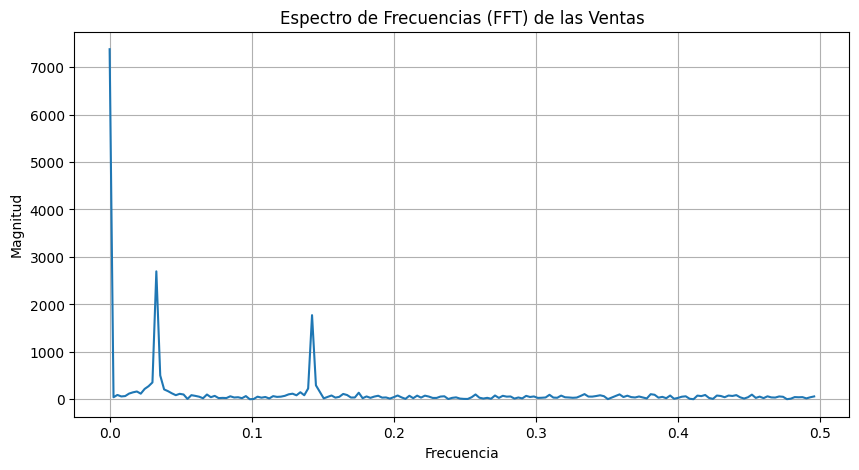

In [3]:
from scipy.fft import fft

# Aplicar la FFT (Transformada Rápida de Fourier)
n = len(df_sales)  # Número de puntos de datos
sales_fft = fft(df_sales['sales'])
frequencies = np.fft.fftfreq(n, d=1)  # Frecuencias correspondientes
sales_fft = np.abs(sales_fft)  # Tomar la magnitud de la FFT

# Graficar el espectro de frecuencias
plt.figure(figsize=(10, 5))
plt.plot(frequencies[:n // 2], sales_fft[:n // 2])  # Solo la mitad positiva
plt.title('Espectro de Frecuencias (FFT) de las Ventas')
plt.xlabel('Frecuencia')
plt.ylabel('Magnitud')
plt.grid(True)
plt.show()

Este gráfico muestra cómo las frecuencias contribuyen a la señal de ventas. El eje horizontal muestra las frecuencias (por ejemplo, cuántos ciclos por día, semana, mes), y el eje vertical muestra la magnitud de cada componente de frecuencia.

3. Interpretación de las frecuencias
- En el gráfico del espectro de frecuencias, los picos en las frecuencias más bajas (por ejemplo, alrededor de 1/7 o 1/30) representan los ciclos dominantes en los datos.
- El pico en la frecuencia alrededor de $1/7$ indica que la serie temporal tiene un patrón semanal (un ciclo de 7 días).
- El pico alrededor de $1/30$ muestra una frecuencia mensual (un ciclo de aproximadamente 30 días).

4. Filtrado de frecuencias no deseadas

Si el analista está interesado solo en los patrones estacionales y quiere eliminar el ruido o las fluctuaciones aleatorias, puede filtrar las frecuencias altas (ruido).

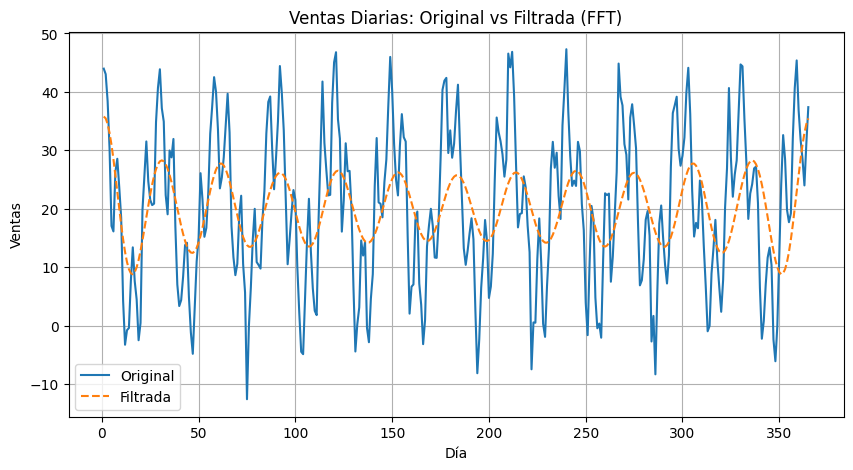

In [4]:
# Filtrar las frecuencias altas (picos no significativos)
sales_fft_filtered = sales_fft.copy()
threshold = 20  # Umbral para las frecuencias altas
sales_fft_filtered[threshold:] = 0  # Eliminar componentes de frecuencia alta

# Realizar la transformada inversa para obtener la serie temporal filtrada
from scipy.fft import ifft
sales_filtered = np.real(ifft(sales_fft_filtered))

# Graficar la serie temporal original y la filtrada
plt.figure(figsize=(10, 5))
plt.plot(df_sales['day'], df_sales['sales'], label='Original')
plt.plot(df_sales['day'], sales_filtered, label='Filtrada', linestyle='--')
plt.title('Ventas Diarias: Original vs Filtrada (FFT)')
plt.xlabel('Día')
plt.ylabel('Ventas')
plt.legend()
plt.grid(True)
plt.show()

5. Conclusiones del análisis
Identificación de patrones estacionales: Usando la Transformada de Fourier, el analista pudo identificar ciclos semanales y mensuales en los datos de ventas.
Filtrado de ruido: El analista pudo eliminar componentes de alta frecuencia que podrían ser ruido, lo que facilita un análisis más limpio y centrado en las tendencias estacionales.
Aplicación a modelos predictivos: Este análisis puede ser útil para construir modelos predictivos de ventas, al integrar la información de las frecuencias en las características del modelo.